# <center>TITANIC SURVIVAL PREDICTIVE ANALYSIS<center>
![Titanic](https://wallup.net/wp-content/uploads/2019/09/202817-titanic-disaster-drama-romance-ship-boat-poster-gt.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### Today we will be predicting the survival of passengers on the basis of other factos like age,class,fare etc

## About Data
1)  Passenger Id- index of the data \
2)  Survived- 0 represent NO and 1 represent YES \
3)  Pclass- It represent ticket class (1=1st, 2=2nd, 3=3rd class) \
4)  Name: Name of Passenger \
5)  Sex: Male or Female \
6)  Age: Age of passenger \
7)  Sibsp: Number of Siblings-Spouses on board \
8)  Parch: Number of Parents-Children on board \
9)  Ticket: Ticket Number \
10) Fare: Passenger Fare\
11) Cabin: Cabin Numberm\
12) Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 

### 1) Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 2) Reading DataSet

In [2]:
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


### 3) Removing or Replacing Null Values

In [6]:
print(train.info())
print("\r")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

#### Remove features that do not influence the analysis, like Cabin (Too many NaN values), Name and Ticket.

In [7]:
train = train.drop(["Cabin","Name", "Ticket"], axis=1)
test = test.drop(["Cabin","Name", "Ticket"], axis=1)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Replacing Null Values with Mean

In [8]:
train["Fare"] = train["Fare"].replace(np.nan, 32)
test["Fare"] = test["Fare"].replace(np.nan, 32)
train["Age"] = train["Age"].replace(np.nan, 30)
test["Age"] = test["Age"].replace(np.nan, 30)
train["Embarked"] = train["Embarked"].replace(np.nan, "C")

In [9]:
print(train.info())
print("\r")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibS

####  ---All null values Removed---

### 4) Categorozing Data as discreate integer values

Changing categorical features Sex and Embarked by numbers

In [10]:
train["Sex"].replace(["female","male"] , [0,1], inplace = True)
test["Sex"].replace(["female","male"] , [0,1], inplace = True)
train["Embarked"].replace(["Q","S","C"],[0,1,2],inplace=True)
test["Embarked"].replace(["Q","S","C"],[0,1,2],inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


Categorizing Age by Age groups

In [11]:
bins = [0,8,15,20,40,60,100]
names=(['Baby', 'Child', 'Teenager', 'Youngster', 'Adult', 'Senior Citizen'])

train["Age"] = pd.cut(train["Age"], bins, labels = names)
test["Age"] = pd.cut(test["Age"], bins, labels = names)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,Youngster,1,0,7.2500,1
1,2,1,1,0,Youngster,1,0,71.2833,2
2,3,1,3,0,Youngster,0,0,7.9250,1
3,4,1,1,0,Youngster,1,0,53.1000,1
4,5,0,3,1,Youngster,0,0,8.0500,1


Categorizing Fare by numerical values depicting differnt range of fare price

In [12]:
train["Fare"] = pd.cut(train.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])
test["Fare"] = pd.cut(test.Fare,[-1, 130, 260, 390, 520], labels=['1', '2', '3', '4'])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,Youngster,1,0,1,1
1,2,1,1,0,Youngster,1,0,1,2
2,3,1,3,0,Youngster,0,0,1,1
3,4,1,1,0,Youngster,1,0,1,1
4,5,0,3,1,Youngster,0,0,1,1


## 5) Visualizing rate of survival with respect to other factors

In [13]:
train.pivot_table(index = "Sex", values = "Survived")

,Survived
Sex,
0,0.742038
1,0.188908


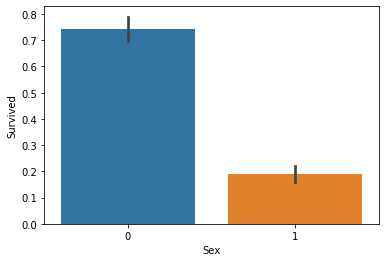

In [14]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.show()

#### Conclusion 1 - Female Passengers were given priority on men

In [15]:
train.pivot_table(index = "Pclass", values = "Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


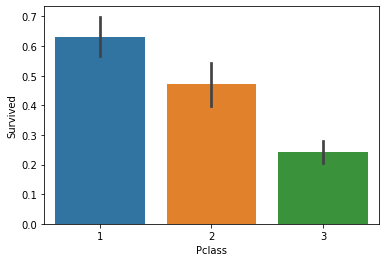

In [19]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

#### Conclusion 2 - First Class Passengers were given priority over others

In [20]:
train.pivot_table(index = "Age", values = "Survived")

,Survived
Age,
Baby,0.666667
Child,0.448276
Teenager,0.343750
Youngster,0.364769
Adult,0.390625
Senior Citizen,0.227273


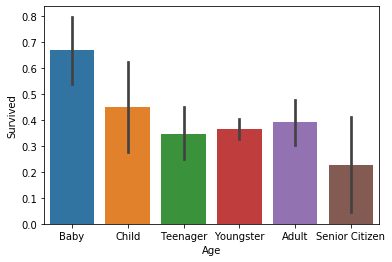

In [21]:

sns.barplot(x="Age", y="Survived", data=train)
plt.show()

#### Conclusion 3 - Babies and Childeren were the most out of all who survived

Categorizing Age by integers values for ease

In [22]:
train["Age"].replace(["Baby","Child","Teenager","Youngster","Adult","Senior Citizen"] , [1,2,3,4,5,6], inplace = True)
test["Age"].replace(["Baby","Child","Teenager","Youngster","Adult","Senior Citizen"] , [1,2,3,4,5,6], inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,4,1,0,1,1
1,2,1,1,0,4,1,0,1,2
2,3,1,3,0,4,0,0,1,1
3,4,1,1,0,4,1,0,1,1
4,5,0,3,1,4,0,0,1,1


In [23]:
train.dtypes    #Checking if all data types are redable or not

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age               int64
SibSp             int64
Parch             int64
Fare           category
Embarked          int64
dtype: object

## 6) Building Model

In [24]:
#Declaring Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
columns = ['Pclass', 'Sex', 'SibSp','Embarked', 'Age', 'Fare']

In [25]:
from sklearn.model_selection import train_test_split
X = train[columns]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [26]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7932960893854749


In [27]:
print("Intercept",lr.intercept_)
print("\r")
print("Coefficient",lr.coef_)   

Intercept [5.92964476]

Coefficient [[-1.01577701e+00 -2.61916567e+00 -4.76669167e-01  9.81064911e-05
  -6.33796431e-01  1.62443772e-01]]


In [28]:
lr.fit(X,y)
test_predictions = lr.predict(test[columns])

In [29]:
#Submission dataframe
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": test_predictions}
submission = pd.DataFrame(submission_df)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [30]:
submission.to_csv("submission.csv",index=False)


print(lr.score(X_test, y_test))

0.7988826815642458


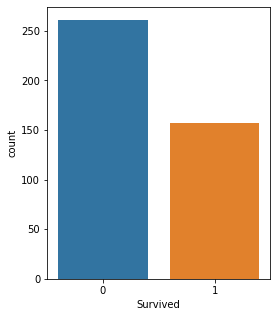

In [34]:
fig=plt.figure(figsize=(4,5))
sns.countplot(submission['Survived'])
plt.show()

In [46]:
print(submission["Survived"].value_counts())
print(submission.shape)

0    261
1    157
Name: Survived, dtype: int64
(418, 2)


# Final Results

* Only 157/418 Passengers Survived from the Data we used for testing pupose
* Accuracy Of Linear Regression Model= 79.88%
* 1st Class Passengers were given priority over other class passengers
* Women and children were the category of people that survived most, they were allowed to board the lifeboats first